# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

- Загрузим данных из csv-файла в датафрейм c помощью библиотеки pandas
- Изучим общую информацию о полученном датафрейме
- Построим гистограмму для всех числовых столбцов таблицы на одном графике

Импортируем библиотеки и выведим первых 5 строк датафрейма.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format

In [2]:
data = pd.read_csv( '/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


Выведем общую информацию о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Общая информация показывает необходимость изменить в следующих строках:** 
- cityCenters_nearest - привести в единый стиль city_сenters_nearest
- first_day_exposition - строка object перевести в datetime
- is_apartment - строка object перевести в булев тип bool(булев тип по вводным данным)
- balcony - вещественное число float64 перевести в  целое число (число балконов) int64
- parks_around3000 - вещественное число float64 перевести в целое число (число парков) int64, приведем в единый стиль parks_around_3000
- ponds_around3000 - вещественное число float64 перевести в целое число (число водоемов) int64, приведем в единый стиль ponds_around_3000

Построим гистограммы.

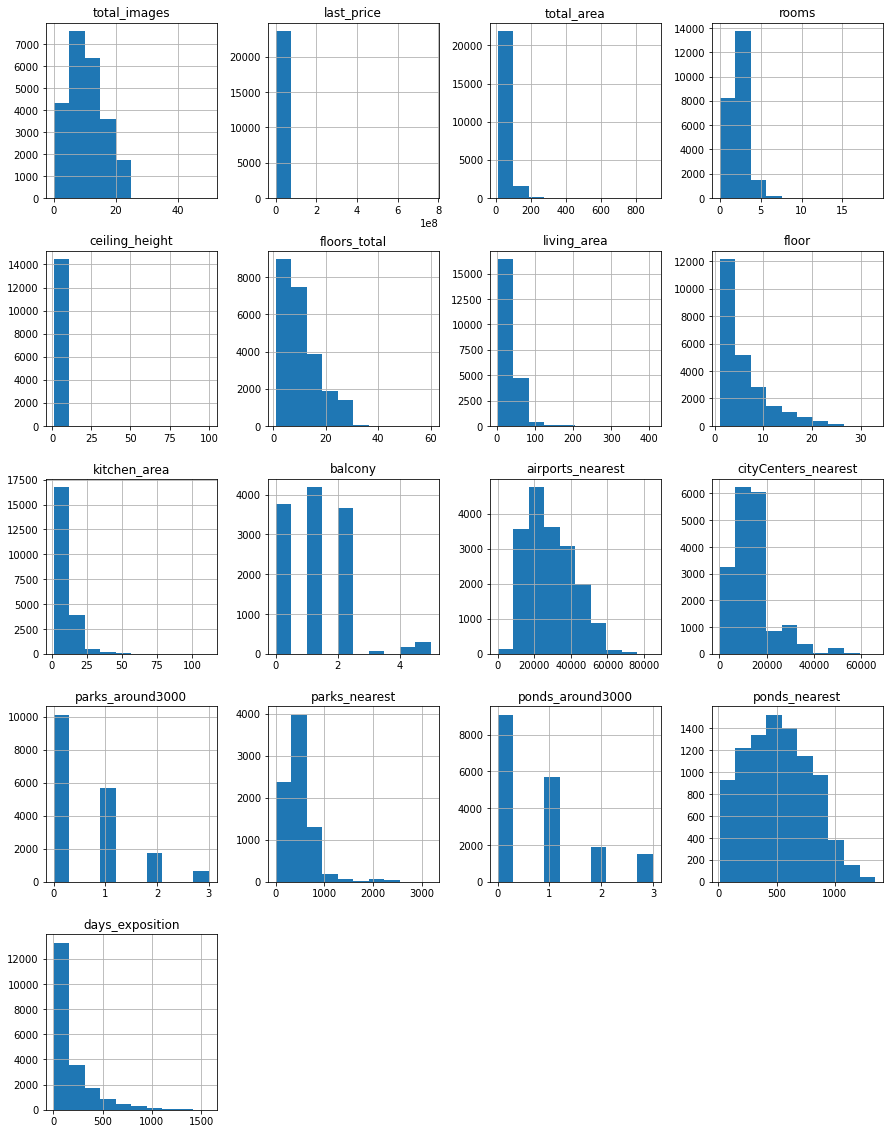

In [5]:
data.hist(figsize=(15, 20));

**Вывод**: всего в файле 23699 строк. В некоторых столбцах отсутствуют значения и необходимо поменять тип данных. Гистограммы показывают, что есть аномальные значения. 

### Выполните предобработку данных

**2.1 Изучие и обработка пропущенных значений.**
- Определим, в каких столбцах есть пропуски
- Заполним пропущенные значения там, где это возможно

Проверим количество пропусков.

In [6]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выведем долю пропущенных значений для каждого столбца.

In [7]:
pd.DataFrame(data.isna().mean()*100)

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


**Стратегия обработки пропусков:**
- **сeiling_height** - вероятно, пользователь не знал точную высоту потолков, поэтому данные не заполнены, либо данные внесены не верно. Проверим уникальные значения и описание столбца. После обработки данных заменим пропуски на медианное или среднее значение.
- **floors_total** - вероятно, это не обязательное поле для заполнения. Категориальное значение - заменить на среднее или медианное значение будет не верным. Оставим пропуски.
- **living_area** - площадь, в которую не входит кухня, коридор, балкон. Вероятно, пользователь не указал данные, так как не знает точную жилую площадь либо не стал высчитывать. Логически заполнить нет возможности. Количество пропусков 8%. Оставим пропуски.
- **is_apartment** - вероятно, это не обязательное поле для заполнения и по умолчанию пользователе считал тип недвижимости жилой. Пропусков 88%. Так как это булев тип, заполним пропуски False.
- **kitchen_area** - вероятно, пользователь не знал точную площадь кухни либо кухня отсутствует, поэтому данные не заполнены. Пропусков меньше 10%, важный параметр, логически заменить нечем. Оставим пропуски.
- **balcony** -логично предположить, если балкон не указан, значит его нет, поэтому данные не заполнены. Заполним значением 0.
- **locality_name**- важный параметр для определения стоимости недвижимости, возможно техническая ошибки при переносе или загрузки данных. Пропусков всего 0,2%, заменим на Неизвестно.
- **airports_nearest** - данные автоматически не заполнились на основе картографических данных. Пропуски на исследование не повлияют. Оставим пропуски.
- **cityCenters_nearest** - данные автоматически не заполнились на основе картографических данных. Пропуски на исследование не повлияют. Оставим пропуски.
- **parks_around3000** - данные автоматически не заполнились на основе картографических данных. Количество пропусков совпадает с ponds_around3000. Предположим, что пропуски говорят о том, что в 3 км. нет парков. Заполним пропуски 0.
- **parks_nearest** - данные автоматически не заполнились на основе картографических данных. Пропуски на исследование не повлияют. Оставим пропуски.
- **ponds_around3000** - данные автоматически не заполнились на основе картографических данных. Количество пропусков совпадает с parks_around3000. Предположим, что пропуски говорят о том, что в 3 км. нет водоемов. Заполним пропуски 0.
- **days_exposition** - важные данные, которые, видимо, не заполнились по технической ошибке. Заполнить логически невозможно. Оставим пропуски.

Проверим уникальные значения.

In [8]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Разброс данных большой. Встречаются объекты с высотой 25, 32 метра. Логично предположить, что на самом деле это 2,5 и 3,2 метра. Посчитаем сколько объектов с высотой потолков выше 20 метров. 

In [9]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'].count()

23

Таких объектов не так много. Разделим такие объекты на 10, чтобы получить корретные значения высоты потолков.

In [10]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/ 10

In [11]:
data['ceiling_height'].describe()#изучим данные высоты потолков

count   14,504.0
mean         2.7
std          0.3
min          1.0
25%          2.5
50%          2.6
75%          2.8
max         14.0
Name: ceiling_height, dtype: float64

Среднее и медианное значения при округлении одинаковые 2,7 метров. Заполним медианным значением пропуски.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

Отсутствующие значения в is_apartment заменим на False.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

До заполнения объектов(парки и водоемы) в радиусе 3 км., убедимся, что в столбцах расстояние до ближайшего объекта нет данных.

In [14]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [15]:
data.query('parks_around3000 not in [0, 1, 2, 3] and parks_nearest >= 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [17]:
data.query('ponds_around3000 not in [0, 1, 2, 3] and ponds_nearest >= 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В столбцах расстояние до ближайшего объекта нет данных, можем заполнить пропуски в столбцах число объектов в 3 км значением 0.0. Также заполним отсутствующие значения в 'balcony'.

In [18]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[[
    'balcony', 'parks_around3000', 'ponds_around3000']].fillna(0.0) 

Отсутствующие значения в locality_name заменим на Неизвестно.

In [19]:
data['locality_name']= data['locality_name'].fillna('Неизвестно')

Проверим заполнение пропусков в столбцах.

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.2 Преобразование типов данных и регистра в единый стиль.**
- Найдем столбцы, в которых нужно изменить тип данных
- Преобразуем тип данных в выбранных столбцах

Переименуем столбцы.

In [21]:
data = data.rename(columns={'cityCenters_nearest':'city_сenters_nearest', 
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'}) 

Проверяем единый стиль столбцов.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Переводим строку object в datetime.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data[
    'first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')

Проверяем, как дата стала выглядеть в таблице.

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


Вещественное число float64 переводим в целое число по нескольким столбцам.

In [25]:
data[['balcony', 'parks_around_3000', 'ponds_around_3000']] = data[
    ['balcony', 'parks_around_3000', 'ponds_around_3000']].astype(int)

Проверяем тип данных.

In [26]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_сenters_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**2.3 Обработка дубликатов.**
- Изучим уникальные значения в столбце с названиями
- Устраним неявные дубликаты

Проверим наличие явных дубликатов

In [27]:
data.duplicated().sum()

0

Изучим уникальные значения в столбце с названиями.

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'го

В уникальных значениях есть неявные дубликаты, например, Мурино и поселок Мурино, а также слово поселок встречается как посёлок. Изменим посёлок на поселок и поменяем неявные дубликаты названий населенных пунктов.

In [29]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')

In [30]:
data = data.replace({'locality_name':{'Мурино': 'поселок Мурино', 'городской поселок Мга': 'поселок городского типа Мга',
                                      'Никольское': 'село Никольское',
                                      'городской поселок Советский': 'поселок городского типа Советский',
                                      'деревня Кудрово': 'Кудрово',
                                      'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
                                      'городской поселок Лесогорский': 'посёлок городского типа Лесогорский',
                                      'городской поселок Павлово': 'поселок городского типа Павлово',
                                      'городской поселок Назия': 'поселок городского типа Назия',
                                      'коттеджный поселок Лесное': 'поселок Лесное',
                                      'Любань': 'поселок Любань',
                                      'городской поселок Рощино': 'поселок городского типа Рощино',
                                      'поселок Рябово': 'поселок городского типа Рябово'}})

Проверяем исправления.

In [31]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Неизвестно', 'Новая Ладога', 'Отрадное',
       'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск',
       'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Новоселье',
       'городской поселок Свирьстрой', 'городской поселок Фёдоровское',
       'городской поселок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Бо

**Вывод** : в процессе предобработки данных было выполнено следующее:
- заполнили пропуски там, где это было логически возможно
- изменили тип данных и привели название столбцов к единому регистру
- проверили явные и неявные дубликаты, привели к единому названию дубликаты в столбце locality_name

### Добавьте в таблицу новые столбцы

**Добавим следующие столбцы:**
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «‎первый», «последний», «другой»)
- расстояние до центра города в километрах

Посчитаем цену одного квадратного метра.

In [32]:
data['square_meter_price'] = (data['last_price']/ data['total_area']).round(2)

Добавим день недели,месяц и год публикации и проверим новые столбцы в датафрейме.

In [33]:
data['publication_day'] = data['first_day_exposition'].dt.weekday

In [34]:
data['publication_month'] = data['first_day_exposition'].dt.month

In [35]:
data['publication_year'] = data['first_day_exposition'].dt.year

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,publication_day,publication_month,publication_year
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,"16,028.0",1,482.0,2,755.0,NaN,"120,370.4",3,3,2019
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,"18,603.0",0,NaN,0,NaN,81.0,"82,920.8",1,12,2018
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,"13,933.0",1,90.0,2,574.0,558.0,"92,785.7",3,8,2015
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,NaN,9,False,...,"6,800.0",2,84.0,3,234.0,424.0,"408,176.1",4,7,2015
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,"8,098.0",2,112.0,1,48.0,121.0,"100,000.0",1,6,2018


Напишем функцию для создания типа этажа квартиры, добавим новый столбец с типом квартиры и проверим новый столбец в датафрейме.

In [37]:
def category_floor(row):  
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    

In [38]:
data['floor_type'] = data.apply(category_floor, axis=1)

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,publication_day,publication_month,publication_year,floor_type
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,"120,370.4",3,3,2019,другой
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,"82,920.8",1,12,2018,первый
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,"92,785.7",3,8,2015,другой
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,NaN,9,False,...,2,84.0,3,234.0,424.0,"408,176.1",4,7,2015,другой
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,"100,000.0",1,6,2018,другой


Добавим расстояние до центра города в километрах, проверим новый столбец.

In [40]:
data['distance_to_center'] = (data['city_сenters_nearest']/ 1000).round(0)

In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,publication_day,publication_month,publication_year,floor_type,distance_to_center
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,482.0,2,755.0,NaN,"120,370.4",3,3,2019,другой,16.0
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,NaN,0,NaN,81.0,"82,920.8",1,12,2018,первый,19.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,...,90.0,2,574.0,558.0,"92,785.7",3,8,2015,другой,14.0
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,NaN,9,False,...,84.0,3,234.0,424.0,"408,176.1",4,7,2015,другой,7.0
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,112.0,1,48.0,121.0,"100,000.0",1,6,2018,другой,8.0


**Вывод**: добавили следующие столбцы:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «‎первый», «последний», «другой»)
- расстояние до центра города в километрах 

### Проведите исследовательский анализ данных

**4.1 Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров:**
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего парка.

Изучим параметры общей площади.

In [42]:
data['total_area'].describe()

count   23,699.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.9
max        900.0
Name: total_area, dtype: float64

In [43]:
data.shape

(23699, 28)

Построим гистограмму по текущим данным.

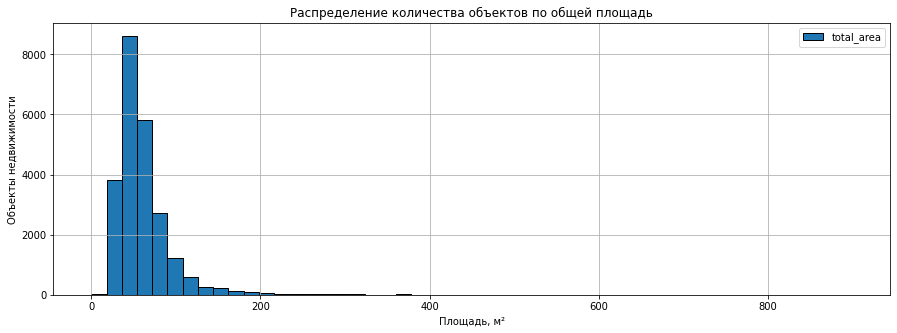

In [44]:
data['total_area'].hist(bins=50, figsize=(15,5), range=(0,900), legend=True, ec='black')
plt.title('Распределение количества объектов по общей площадь')
plt.xlabel('Площадь, м²')
plt.ylabel('Объекты недвижимости')
plt.show()

По гистограмме мы наблюдаем пик около 60-65 м², далее спад и длинный хвост выбивающихся значений. Удалим объекты, площадь которых больше 200 м², проверим удаление, построим гистограмму.

In [45]:
data.drop(data[data['total_area'] > 200].index , inplace=True)

In [46]:
data['total_area'].describe()

count   23,472.0
mean        58.2
std         26.5
min         12.0
25%         40.0
50%         51.9
75%         68.9
max        200.0
Name: total_area, dtype: float64

In [47]:
data.shape

(23472, 28)

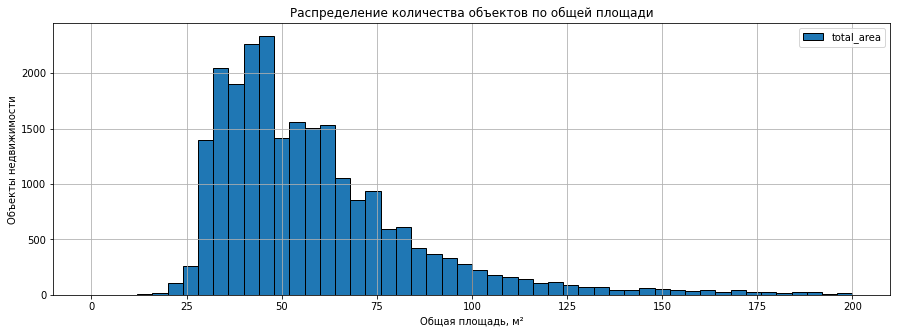

In [48]:
data['total_area'].hist(bins=50, figsize=(15,5), range=(0,200), legend=True, ec='black')
plt.title('Распределение количества объектов по общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют площадь примерно от 30 до 65 м². Чаще всего встречается объекты с площадью около 45 м². Объекты меньше 30 м² и больше 100 м² встречаются редко. 

Изучим параметры жилой площади.

In [49]:
data['living_area'].describe()

count   21,597.0
mean        33.3
std         17.4
min          2.0
25%         18.6
50%         30.0
75%         42.0
max        164.7
Name: living_area, dtype: float64

Построим гистограмму по текущим данным.

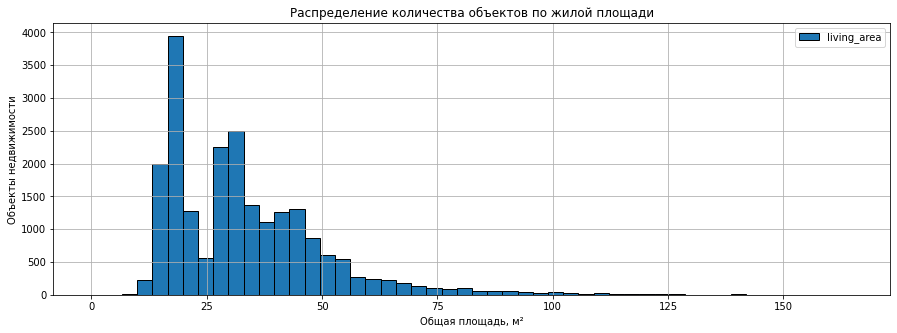

In [50]:
data['living_area'].hist(bins=50, figsize=(15,5), range=(0,165), legend=True, ec='black')
plt.title('Распределение количества объектов по жилой площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Объекты недвижимости')
plt.show()

По гистограмме мы наблюдаем пик около 18 м², далее спад и длинный хвост выбивающихся значений. Удалим объекты, жилая площадь которых больше 75 м², проверим удаление, построим гистограмму.

In [51]:
data.drop(data[data['living_area'] > 75].index , inplace=True)

In [52]:
data['living_area'].describe()

count   20,947.0
mean        31.4
std         13.7
min          2.0
25%         18.4
50%         30.0
75%         40.8
max         75.0
Name: living_area, dtype: float64

In [53]:
data.shape

(22822, 28)

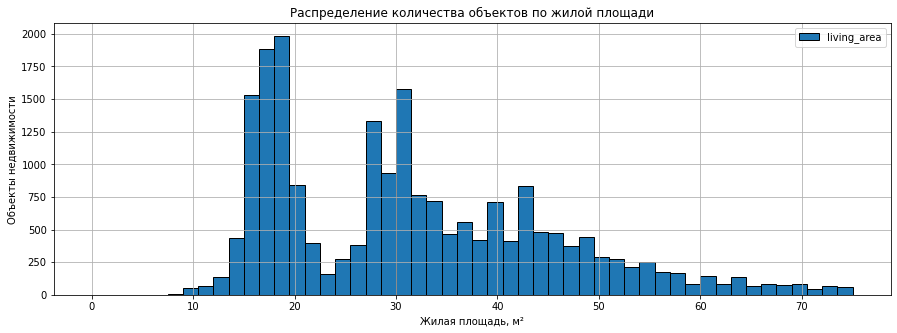

In [54]:
data['living_area'].hist(bins=50, figsize=(15,5), range=(0,75), legend=True, ec='black')
plt.title('Распределение количества объектов по жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют жилую площадь примерно от 15 до 18 м². Чаще всего встречается объекты с жилой площадью около 18 м².

Изучим параметры площади кухни, построим гистограмму по текущим данным.

In [55]:
data['kitchen_area'].describe()

count   20,594.0
mean        10.2
std          5.1
min          1.3
25%          7.0
50%          9.0
75%         11.5
max         93.2
Name: kitchen_area, dtype: float64

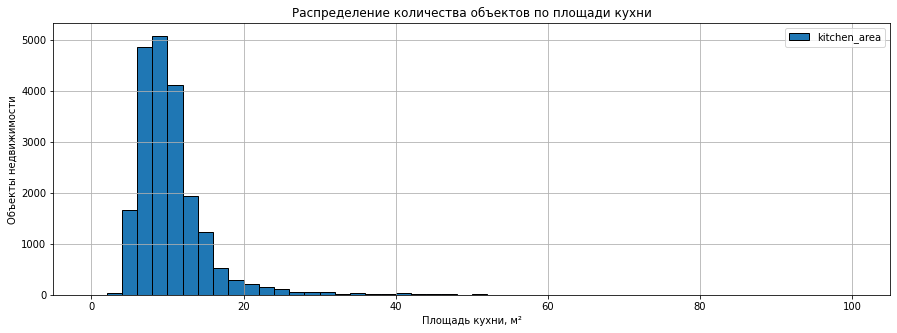

In [56]:
data['kitchen_area'].hist(bins=50, figsize=(15,5), range=(0,100), legend=True, ec='black')
plt.title('Распределение количества объектов по площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Объекты недвижимости')
plt.show()

По гистограмме мы наблюдаем пик около 10 м², далее спад и длинный хвост выбивающихся значений. Использую метод диаграммы размаха, отбросим значения, которые не входят в нормальные значения.

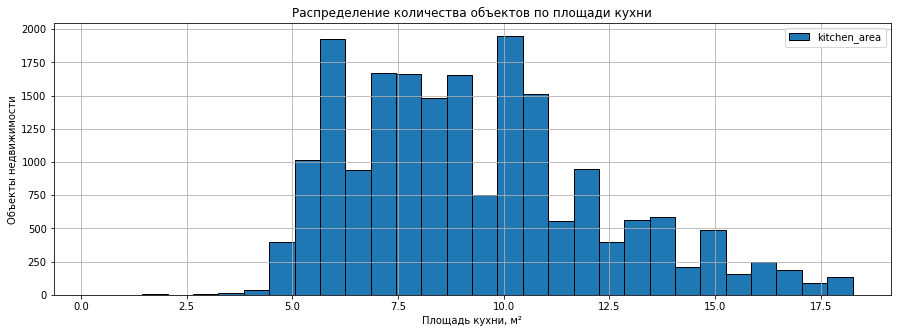

In [57]:
q1 = data['kitchen_area'].quantile(.25) # первый квартиль 25%
q3 = data['kitchen_area'].quantile(.75) # третий квартиль 75%
iqr = q3 - q1 #межквартиильный размах


data['kitchen_area'].hist(bins=30, figsize=(15,5), range=((q1-1.5*iqr),(q3+1.5*iqr)), legend=True, ec='black')
plt.title('Распределение количества объектов по площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют площадь кухни примерно от 5,5 до 12 м².  Чаще всего встречается объекты с площадью кухни около 6 и 11 м².

Изучим параметры цены объектов, построим гистограмму по текущим данным.

In [58]:
data['last_price'].describe()

count        22,822.0
mean      5,609,805.4
std       4,918,341.2
min          12,190.0
25%       3,400,000.0
50%       4,530,000.0
75%       6,450,000.0
max     289,238,400.0
Name: last_price, dtype: float64

Из данных видны сильно выбивающиеся значения. Удалим объекты, стоимость которых ниже 100 тысяч и выше 20 млн. рублей.

In [59]:
data.drop(data[data['last_price'] < 100000].index , inplace=True)
data.drop(data[data['last_price'] > 20000000].index , inplace=True)

In [60]:
data['last_price'].describe()

count       22,506.0
mean     5,245,611.0
std      2,967,587.4
min        430,000.0
25%      3,370,000.0
50%      4,500,000.0
75%      6,300,000.0
max     20,000,000.0
Name: last_price, dtype: float64

In [61]:
data.shape

(22506, 28)

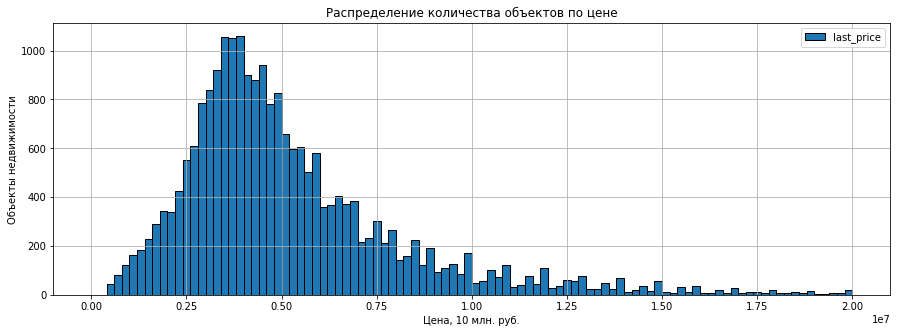

In [62]:
data['last_price'].hist(bins=100, figsize=(15,5), range=(100, 20000000), legend=True, ec='black')
plt.title('Распределение количества объектов по цене')
plt.xlabel('Цена, 10 млн. руб.')
plt.ylabel('Объекты недвижимости', )
plt.show()

По гистограмме мы наблюдаем пик около 4 млн. рублей, далее спад и длинный хвост выбивающихся значений. Использую метод диаграммы размаха, отбросим значения, которые не входят в нормальные значения.

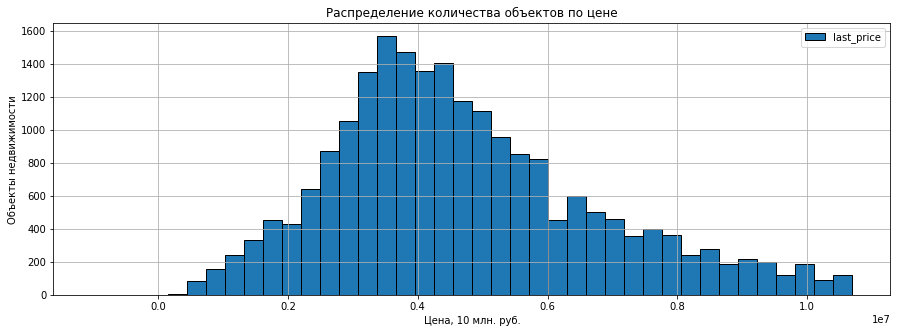

In [63]:
q1 = data['last_price'].quantile(.25) # первый квартиль 25%
q3 = data['last_price'].quantile(.75) # третий квартиль 75%
iqr = q3 - q1 #межквартиильный размах


data['last_price'].hist(bins=40, figsize=(15,5), range=((q1-1.5*iqr),(q3+1.5*iqr)), legend=True, ec='black')
plt.title('Распределение количества объектов по цене')
plt.xlabel('Цена, 10 млн. руб.')
plt.ylabel('Объекты недвижимости')
plt.show()

Большая часть объектов недвижимости находятся в ценовом диапазоне от 2,5 до 6 млн. рублей . Чаще всего встречается объекты стоимостью около 3,5 млн. рублей.

Изучим параметры количество комнат, построим гистограмму по текущим данным.

In [64]:
data['rooms'].describe()

count   22,506.0
mean         2.0
std          0.9
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          7.0
Name: rooms, dtype: float64

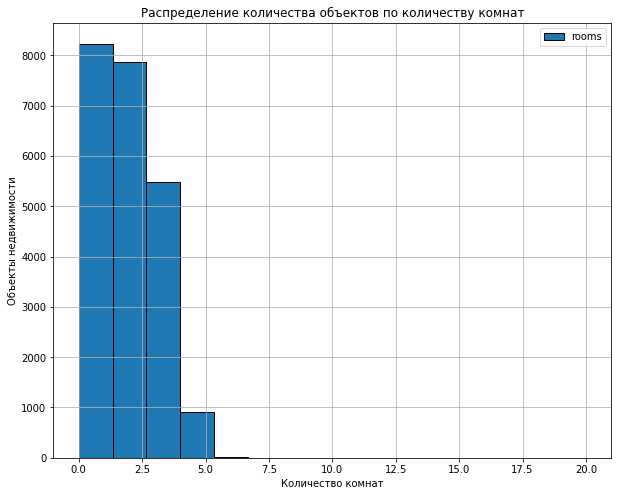

In [65]:
data['rooms'].hist(bins=15, figsize=(10,8), range=(0,20), legend=True, ec='black')
plt.title('Распределение количества объектов по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Объекты недвижимости')
plt.show()

По гистограмме не наблюдается большого разброса данных. Чаще встречаются объекты с одной и двумя комнатами. Есть объекты с количеством комнат 7, но таких крайне мало.

Изучим параметры высоты потолков, построим гистограмму по текущим данным.

In [66]:
data['ceiling_height'].describe()

count   22,506.0
mean         2.7
std          0.2
min          1.0
25%          2.6
50%          2.6
75%          2.7
max         14.0
Name: ceiling_height, dtype: float64

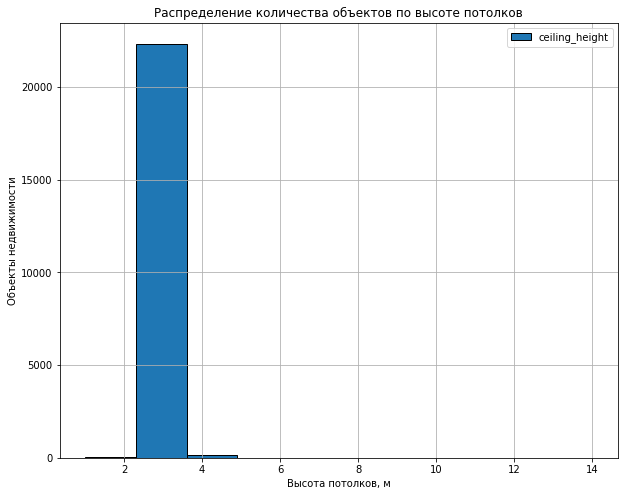

In [67]:
data['ceiling_height'].hist(bins=10, figsize=(10,8), range=(1,14), legend=True, ec='black')
plt.title('Распределение количества объектов по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Объекты недвижимости')
plt.show()

По текущим данных гистограмму невозможно анализировать. Использую метод диаграммы размаха, отбросим значения, которые не входят в нормальные значения.

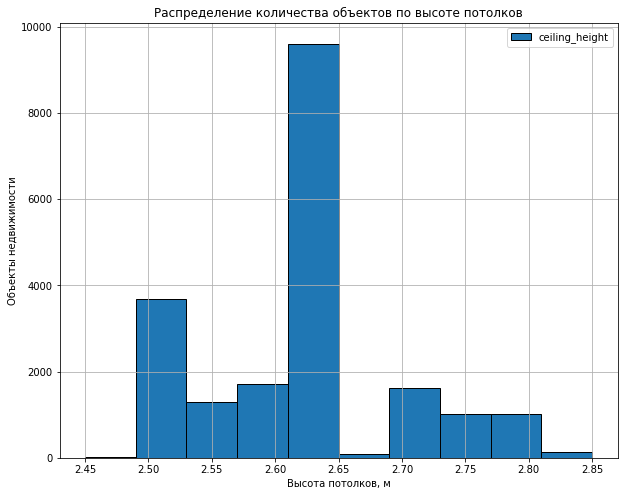

In [68]:
q1 = data['ceiling_height'].quantile(.25) # первый квартиль 25%
q3 = data['ceiling_height'].quantile(.75) # третий квартиль 75%
iqr = q3 - q1 #межквартиильный размах

data['ceiling_height'].hist(bins=10, figsize=(10,8), range=((q1-1.5*iqr),(q3+1.5*iqr)), legend=True, ec='black')
plt.title('Распределение количества объектов по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют высоту потолков около 2,65 метров.

Изучим количество уникальных значений в столбце типа этажа, построим гистограмму по текущим данным.

In [69]:
data['floor_type'].value_counts()

другой       16575
последний     3090
первый        2841
Name: floor_type, dtype: int64

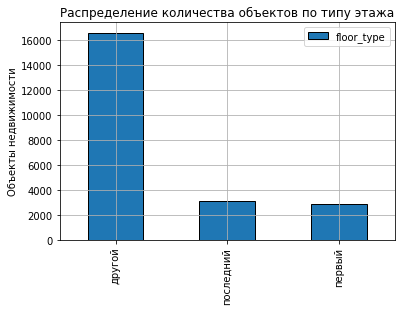

In [70]:
data['floor_type'].value_counts().plot.bar(figsize=(6, 4), ec='black', legend=True, grid=True)
plt.title('Распределение количества объектов по типу этажа')
plt.ylabel('Объекты недвижимости')
plt.show()

Больше всего объектов недвижимости с типом этажа - другой. Количество объектов с типом первый/последний этаж примерно одинаковое.

Изучим параметры общего количества этажей, построим гистограмму по текущим данным.

In [71]:
data['floors_total'].describe()

count   22,423.0
mean        10.8
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

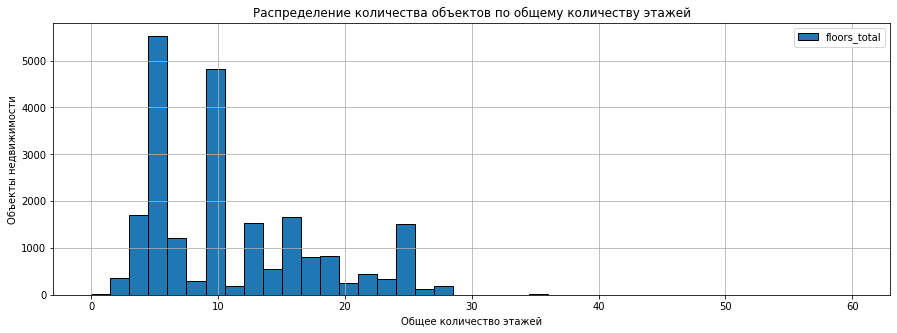

In [72]:
data['floors_total'].hist(bins=40, figsize=(15,5), range=(0,60), legend=True, ec='black')
plt.title('Распределение количества объектов по общему количеству этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Объекты недвижимости')
plt.show()

По гистограмме практически нет объектов с общим количествов этажей больше 28. Большее количество объектов имеют общее количество этажей 5, меньше объектов имеют 9-10 этажей.

Изучим параметры расстояния до центра города, построим гистограмму по текущим данным.

In [73]:
data['city_сenters_nearest'].describe()

count   17,029.0
mean    14,674.4
std      8,527.4
min        208.0
25%     10,185.0
50%     13,370.0
75%     16,536.0
max     65,968.0
Name: city_сenters_nearest, dtype: float64

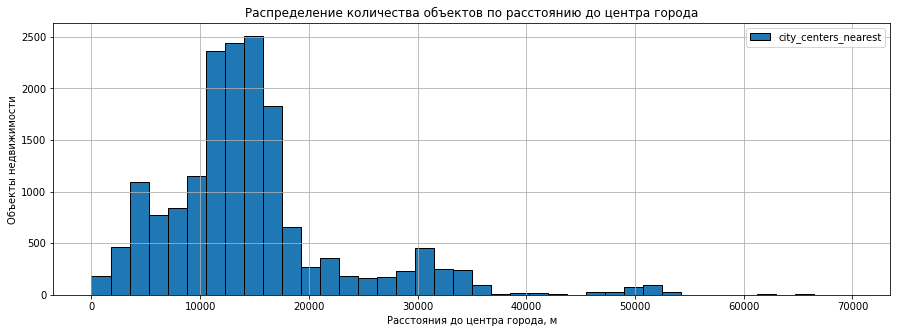

In [74]:
data['city_сenters_nearest'].hist(bins=40, figsize=(15,5), range=(0,70000), legend=True, ec='black')
plt.title('Распределение количества объектов по расстоянию до центра города')
plt.xlabel('Расстояния до центра города, м')
plt.ylabel('Объекты недвижимости')
plt.show()

Отбрасывать редкие значения не будем, так как в объектах много деревень и поселков, которые действительно могут находиться далеко от центра города. Большая часть объектов находится примерно на расстоянии от 4 до 17 км.

Изучим параметры расстояния до ближайшего парка, построим гистограмму по текущим данным.

In [75]:
data['parks_nearest'].describe()

count   7,298.0
mean      495.7
std       343.4
min         1.0
25%       290.0
50%       458.0
75%       617.0
max     3,190.0
Name: parks_nearest, dtype: float64

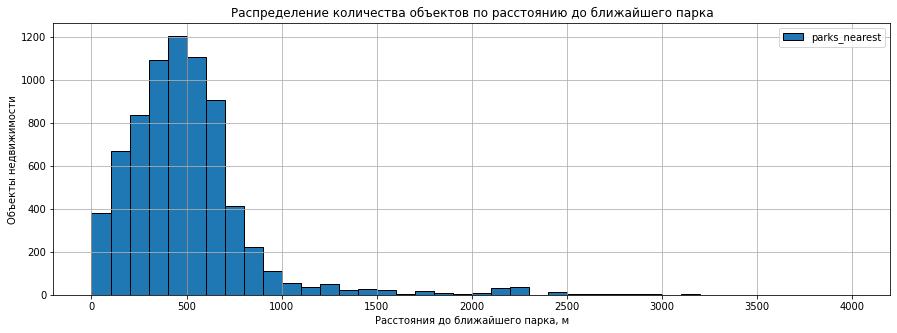

In [76]:
data['parks_nearest'].hist(bins=40, figsize=(15,5), range=(0,4000), legend=True, ec='black')
plt.title('Распределение количества объектов по расстоянию до ближайшего парка')
plt.xlabel('Расстояния до ближайшего парка, м')
plt.ylabel('Объекты недвижимости')
plt.show()

Так как большая часть объектов недвижимости имеют пропуски в столбце parks_nearest, то можем оценить только малую выборку объектов. По данным 7298 объектов, большая часть находится на расстоянии от 100 до 800 метров до ближайшего парка. 

**4.2 Изучим, как быстро продавались квартиры:**
- построим гистограммы
- посчитаем среднее и медиану.

Построим гистограмму по текущим данным.

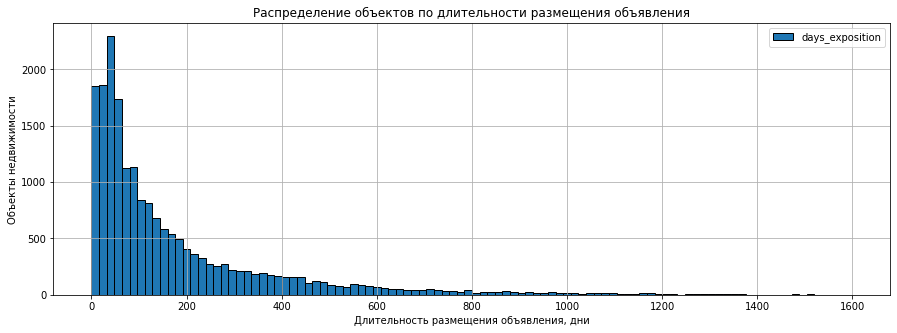

In [77]:
data['days_exposition'].hist(bins=100, figsize=(15,5), range=(0,1600), legend=True, ec='black')
plt.title('Распределение объектов по длительности размещения объявления')
plt.xlabel('Длительность размещения объявления, дни')
plt.ylabel('Объекты недвижимости')
plt.show()

Оценить полученную диаграмму сложно, так как есть объекты, которые продавались больше двух лет. Возьмем меньший диапазон - 1 год.

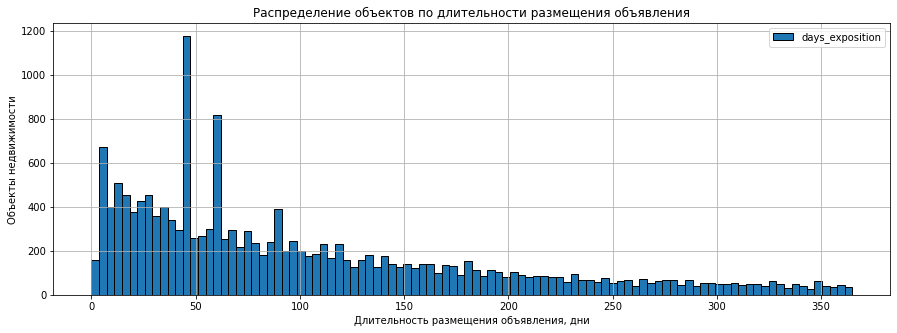

In [78]:
data['days_exposition'].hist(bins=100, figsize=(15,5), range=(0,365), legend=True, ec='black')
plt.title('Распределение объектов по длительности размещения объявления')
plt.xlabel('Длительность размещения объявления, дни')
plt.ylabel('Объекты недвижимости')
plt.show()

Видны пики в значениях около 45 и 65 дней, то есть чаще всего объекты продаются за это время. Проверим среднее и медианное время продажи. 

In [79]:
data['days_exposition'].describe()

count   19,636.0
mean       175.2
std        213.6
min          1.0
25%         44.0
50%         92.0
75%        223.0
max      1,580.0
Name: days_exposition, dtype: float64

**Вывод:** среднее время продажи объекты 181 день, медианное время 95 дней. Есть объекты, которые были проданы за 1 день, а также объекты, которые продавались несколько лет. Продажу можно считать быстрой, если объект был продан до 45 дней, что соответствует первому квартилю. Средней продажей можно считать объявления, время продажи которых составило около 180 дней. Необычно долгими - объекты, которые продавились около 232 дней и больше.

**4.3 Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.**

Изучим, зависит ли цена от:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

Рассмотрим каждый фактор отдельно.

Построим график зависимости цены от общей площади объекта.

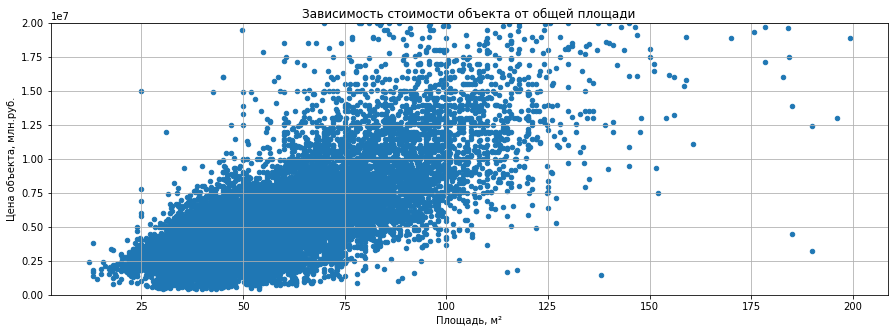

In [80]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(15,5))
plt.title('Зависимость стоимости объекта от общей площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()

Из графика видна прямая зависимость - чем больше площадь объекта, тем выше цена.

Построим график зависимости цены от жилой площади объекта.

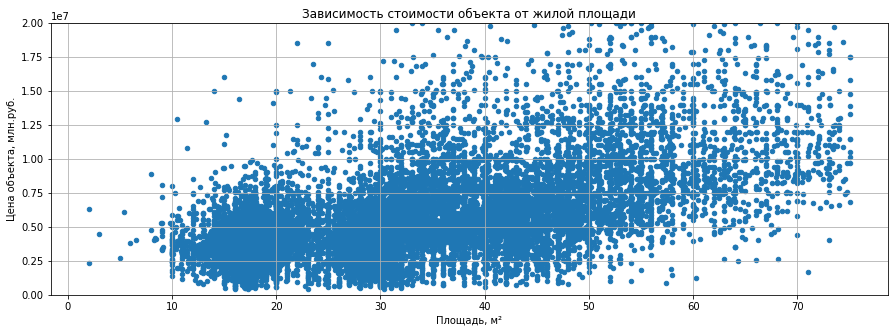

In [81]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(15,5))
plt.title('Зависимость стоимости объекта от жилой площади')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()

Из графика видна прямая зависимость - чем больше жилая площадь объекта, тем выше цена. Обратим внимание, что зависимость начинает "стелиться" вдоль оси Х, что говорит о том, что зависимость чуть меньше, чем от общей площади объекта.

Построим график зависимости цены от площади кухни объекта.

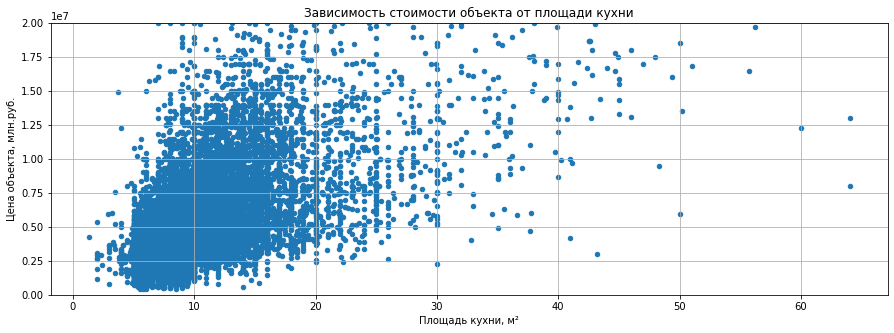

In [82]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(15,5))
plt.title('Зависимость стоимости объекта от площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()

Из графика видна прямая зависимость - чем больше площадь кухни объекта, тем выше цена.

Построим график зависимости цены от количества комнат объекта.

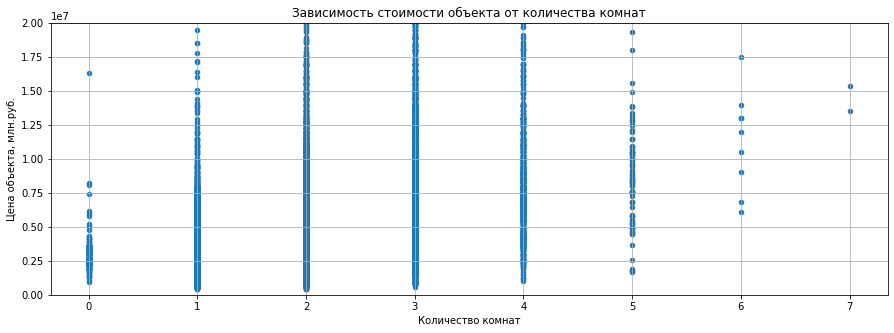

In [83]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(15,5))
plt.title('Зависимость стоимости объекта от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()

Из графика видно, что при увеличении числа комнат, начинает расти цена объекта.

Выведем распределение объектов по типам этажа.

In [84]:
data['floor_type'].value_counts()

другой       16575
последний     3090
первый        2841
Name: floor_type, dtype: int64

Оценивать зависимость по данным, где тип "другие" встречается чаще всего, будет не верным. Посчитаем среднее и медианное значения.

In [85]:
floor_type_price = data.pivot_table(index='floor_type', values='last_price', aggfunc=['count', 'median', 'mean'])
floor_type_price.columns = ['count', 'median', 'mean']
display(floor_type_price)

,count,median,mean
floor_type,,,
другой,16575,"4,700,000.0","5,482,113.8"
первый,2841,"3,850,000.0","4,281,384.9"
последний,3090,"4,150,000.0","4,863,518.3"


Для построения графика зависимости будем использовать медианное значение.

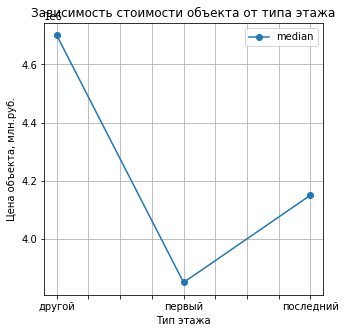

In [86]:
floor_type_price.plot( y='median', grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость стоимости объекта от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена объекта, млн.руб.')
plt.show()


Из графика по медианному значению видно, что объекты типа другие имеют большую стоимость, чем квартиры с типом последний. Меньшая стоимость у квартир с типом этажа первый.

Построим график зависимости цены от дня, месяца, года публикации.

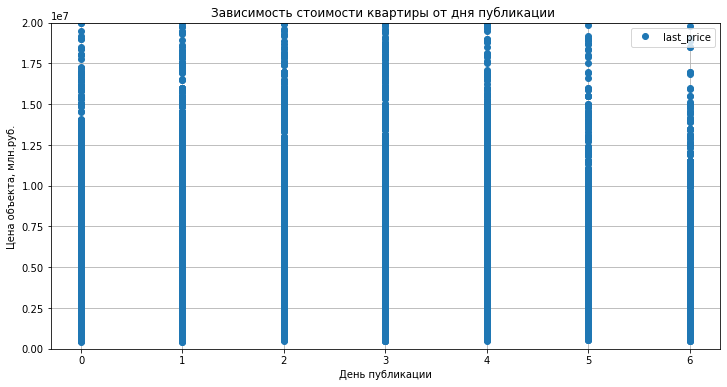

In [87]:
data.plot(x = 'publication_day', y = 'last_price', style='o', grid=True, figsize=(12, 6))
plt.title('Зависимость стоимости квартиры от дня публикации ')
plt.xlabel('День публикации')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()


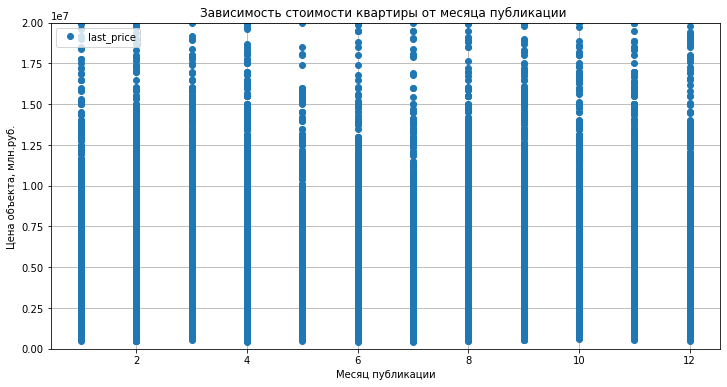

In [88]:
data.plot(x = 'publication_month', y = 'last_price', style='o', grid=True, figsize=(12, 6))
plt.title('Зависимость стоимости квартиры от месяца публикации ')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()

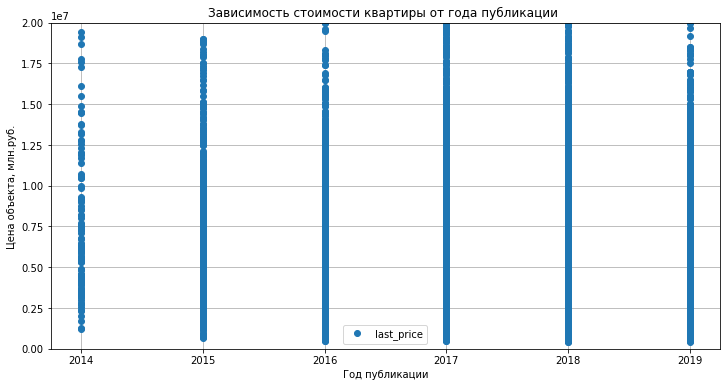

In [89]:
data.plot(x = 'publication_year', y = 'last_price', style='o', grid=True, figsize=(12, 6))
plt.title('Зависимость стоимости квартиры от года публикации ')
plt.xlabel('Год публикации')
plt.ylabel('Цена объекта, млн.руб.')
plt.ylim(0, 20000000)
plt.show()

Из графиков видно, что стоимость объекта не зависит от дня, месяца и года публикации.

**Вывод:** Больше всего на стоимость влияет общая площадь объекта, в меньшей степени жилая площадь и площадь кухни. Количество комнат также влияет на стоимость, чем больше комнат, тем дороже объект недвижимости. При покупки недвижимости обращают внимание и на тип этажа- предпочтительнее тип этажа не первый и не последний. Тип этажа первый менее популярен. Время публикации никак не влияет на стоимость объекта.

**4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Выведем 10 населённых пунктах с наибольшим числом объявлений и построим сводную таблицу с количеством объявлений и средней ценой квадратного метра.

In [90]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      14597
поселок Мурино         589
Кудрово                472
поселок Шушары         439
Всеволожск             396
Пушкин                 352
Колпино                336
поселок Парголово      326
Гатчина                306
Выборг                 232
Name: locality_name, dtype: int64

In [91]:
top_10_locality = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
top_10_locality.columns = ['count', 'mean']
top_10_locality.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,14597,"108,978.2"
поселок Мурино,589,"86,113.6"
Кудрово,472,"95,324.9"
поселок Шушары,439,"78,666.2"
Всеволожск,396,"67,193.9"
Пушкин,352,"101,867.6"
Колпино,336,"75,370.0"
поселок Парголово,326,"90,332.3"
Гатчина,306,"68,797.7"


**Вывод:** Самая высокая средняя стоимость одного квадратного метра в городе Санкт-Петербург, самая низная стоимость одного квадратного метра в Выборге.

**4.5 Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра. Узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.**

Построим график зависимости цены одного квадратного метра от удаления от центра города.

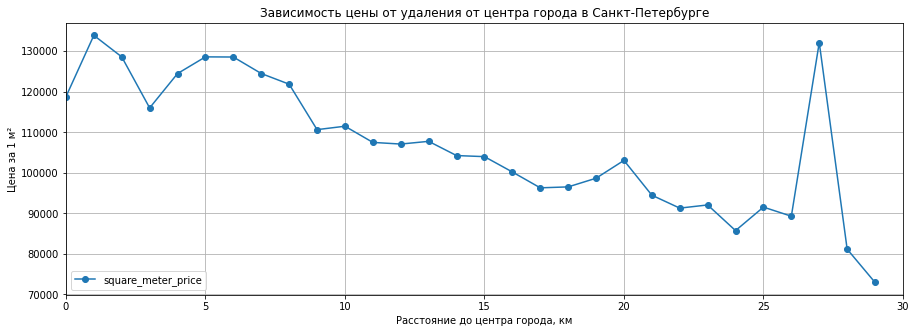

In [92]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(
           index='distance_to_center', values='square_meter_price').plot(
    grid=True, style='o-', xlim=(0,30), figsize=(15, 5))

plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Цена за 1 м²')
plt.show()


Выведем значения цен по удаленности от центра города.

In [93]:
data.query(
    'locality_name == "Санкт-Петербург" and distance_to_center < 10').pivot_table(
    index='distance_to_center', values='square_meter_price')

,square_meter_price
distance_to_center,
0.0,"118,752.9"
1.0,"133,884.0"
2.0,"128,572.9"
3.0,"115,991.7"
4.0,"124,461.4"
5.0,"128,578.5"
6.0,"128,541.1"
7.0,"124,474.5"
8.0,"121,841.4"


 **Вывод:** В целом, несмотря на скачок цены на 5 и 6-м км., зависимость цены линейная, чем ближе квартира к центру города, тем выше цена метра. Скачок на 5 и 6-м км. может говорить об элитном районе, где стоимость недвижимости выше. 

### Напишите общий вывод

Всего в файле оказалось 23699 строк. 

*В процессе предобработки данных было выполнено следующее:*

- заполнили пропуски там, где это было логически возможно
- изменили тип данных и привели название столбцов к единому регистру
- проверили явные и неявные дубликаты, привели к единому названию дубликаты в столбце locality_name

*Добавили следующие столбцы:*

- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «‎первый», «последний», «другой»)
- расстояние до центра города в километрах

*Провели исследовательский анализ данных:*

Изучили перечисленные ниже параметры объектов и построили отдельные гистограммы для каждого из этих параметров:

- общая площадь: большая часть объектов недвижимости имеют площадь примерно от 30 до 65 м². Чаще всего встречается объекты с площадью около 45 м². Объекты меньше 30 м² и больше 100 м² встречаются редко.
- жилая площадь: большая часть объектов недвижимости имеют жилую площадь примерно от 15 до 18 м². Чаще всего встречается объекты с жилой площадью около 18 м².
- площадь кухни: большая часть объектов недвижимости имеют площадь кухни примерно от 5,5 до 12 м².  Чаще всего встречается объекты с площадью кухни около 6 м².
- цена объекта: большая часть объектов недвижимости находятся в ценовом диапазоне от 2,8 до 5,5 млн. рублей . Чаще всего встречается объекты стоимостью около 3,5 млн. рублей.
- количество комнат: чаще встречаются объекты с одной и двумя комнатами. Есть объекты с количеством комнат 6 и больше, но таких крайне мало
- высота потолков: большая часть объектов недвижимости имеют высоту потолков около 2,6 метров.
- тип этажа квартиры («первый», «последний», «другой»): больше всего объектов недвижимости с типом этажа - другой. Количество объектов с типом первый/последний этаж примерно одинаковое.
- общее количество этажей в доме: большее количество объектов имеют общее количество этажей 5, меньше объектов имеют 9 этажей.
- расстояние до центра города в метрах: большая часть объектов находится примерно на расстоянии от 4 до 17 км.
- расстояние до ближайшего парка:так как большая часть объектов недвижимости имеют пропуски в столбце parks_nearest, то можем оценить только малую выборку объектов. По данным 8079 объектов, большая часть находится на расстоянии от 100 до 800 метров до ближайшего парка.

*Изучили, как быстро продавались квартиры:*

- построим гистограммы
- посчитаем среднее и медиану.

Среднее время продажи объекты 181 день, медианное время 95 дней. Есть объекты, которые были проданы за 1 день, а также объекты, которые продавались несколько лет. Продажу можно считать быстрой, если объект был продан до 45 дней, что соответствует первому квартилю. Средней продажей можно считать объявления, время продажи которых составило около 180 дней. Необычно долгими - объекты, которые продавились около 232 дней и больше.

*Изучили, зависит ли цена от:*

- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

Больше всего на стоимость влияет общая площадь объекта, в меньшей степени жилая площадь и площадь кухни. Количество комнат также влияет на стоимость, чем больше комнат, тем дороже объект недвижимости. При покупки недвижимости обращют внимание и на тип этажа- предпочтительнее тип этажа не первый и не последний. Тип этажа первый менее популярен. Время публикации никак не влияет на стоимость объекта.

*Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.*

Самая высокая средняя стоимость одного квадратного метра в городе Санкт-Петербург, самая низкая стоимость одного квадратного метра в Выборге.

*Выделили квартиры в Санкт-Петербурге и вычислили их среднюю стоимость на разном удалении от центра. Узнали среднюю цену квартир в одном километре от центра, в двух и так далее.*

В целом, несмотря на скачок цены на 7-м км., зависимость цены линейная, чем ближе квартира к центру города, тем выше цена метра. 
Скачок на 7м км. может говорить об элитном районе, где стоимость недвижимости выше.